In [266]:
import requests
import time
import glob
from bs4 import BeautifulSoup
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set(rc={'figure.figsize':(17,9)})

## declarar directorio de datos

In [3]:
data_dir = '/Users/nu9ve/data/mexico/sic/'
# data_dir = './'

In [323]:
# visit directory page
res = requests.get('https://sic.gob.mx/datos.php')
soup = BeautifulSoup(res.text, 'html.parser')

In [324]:
recursos_urls = []
for recurso in soup.find_all("div", class_="recurso"):
    recursos_urls.append('https://sic.gob.mx{}'.format(recurso.find('a').get('href')))
recursos_urls

['https://sic.gob.mx/datos.php?table=auditorio',
 'https://sic.gob.mx/datos.php?table=rnbp',
 'https://sic.gob.mx/datos.php?table=otra_bib',
 'https://sic.gob.mx/datos.php?table=teatro',
 'https://sic.gob.mx/datos.php?table=museo',
 'https://sic.gob.mx/datos.php?table=libreria',
 'https://sic.gob.mx/datos.php?table=casa_artesania',
 'https://sic.gob.mx/datos.php?table=galeria',
 'https://sic.gob.mx/datos.php?table=universidad',
 'https://sic.gob.mx/datos.php?table=centro_cultural',
 'https://sic.gob.mx/datos.php?table=centro_desarrollo_indigena',
 'https://sic.gob.mx/datos.php?table=comp_cine',
 'https://sic.gob.mx/datos.php?table=fototeca',
 'https://sic.gob.mx/datos.php?table=fonoteca',
 'https://sic.gob.mx/datos.php?table=catedral',
 'https://sic.gob.mx/datos.php?table=patrimonio_humanidad',
 'https://sic.gob.mx/datos.php?table=zona_arqueologica',
 'https://sic.gob.mx/datos.php?table=fnme',
 'https://sic.gob.mx/datos.php?table=otra_declaratoria',
 'https://sic.gob.mx/datos.php?table

## descargar csvs de cada recurso en el directorio

In [23]:
def download_file(url):
    local_filename = data_dir + url.split('/')[-1]
    # NOTE the stream=True parameter below
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                # If you have chunk encoded response uncomment if
                # and set chunk_size parameter to None.
                #if chunk: 
                f.write(chunk)
    return local_filename

In [30]:
for recurso_url in recursos_urls:
    res_rec = requests.get(recurso_url)
    soup_rec = BeautifulSoup(res_rec.text, 'html.parser')
    for download_link in soup_rec.find_all('div', class_='formato_csv'):
        print('downloading {}'.format(download_link.find('a').get('href')))
        file = download_file('https:{}'.format(download_link.find('a').get('href')))
        print(file)
        time.sleep(1)
    time.sleep(0.5)

downloading //sic.gob.mx/opendata/d/0_auditorio_directorio.csv
/Users/nu9ve/data/mexico/sic/0_auditorio_directorio.csv
downloading //sic.gob.mx/opendata/d/0_biblioteca_directorio.csv
/Users/nu9ve/data/mexico/sic/0_biblioteca_directorio.csv
downloading //sic.gob.mx/opendata/d/0_otra_bib_directorio.csv
/Users/nu9ve/data/mexico/sic/0_otra_bib_directorio.csv
downloading //sic.gob.mx/opendata/d/0_teatro_directorio.csv
/Users/nu9ve/data/mexico/sic/0_teatro_directorio.csv
downloading //sic.gob.mx/opendata/d/0_museo_directorio.csv
/Users/nu9ve/data/mexico/sic/0_museo_directorio.csv
downloading //sic.gob.mx/opendata/d/0_museo_analitico.csv
/Users/nu9ve/data/mexico/sic/0_museo_analitico.csv
downloading //sic.gob.mx/opendata/d/0_libreria_directorio.csv
/Users/nu9ve/data/mexico/sic/0_libreria_directorio.csv
downloading //sic.gob.mx/opendata/d/0_casa_artesania_directorio.csv
/Users/nu9ve/data/mexico/sic/0_casa_artesania_directorio.csv
downloading //sic.gob.mx/opendata/d/0_galeria_directorio.csv
/Us

## explorar archivos

In [4]:
all_dfs = []
all_paths = glob.glob("%s*.csv" % (data_dir))
all_fns = []
for csv_path in all_paths:
    sic_df = pd.read_csv(csv_path, encoding = "ISO-8859-1")
    print(csv_path.split('/')[-1])
    print(sic_df.columns)
    print(sic_df.shape)
    print()
    all_dfs.append(sic_df)
    all_fns.append(csv_path.split('/')[-1])

0_casa_artesania_directorio.csv
Index(['casa_artesania_id', 'casa_artesania_nombre',
       'casa_artesania_adscripcion', 'estado_id', 'nom_ent', 'municipio_id',
       'nom_mun', 'localidad_id', 'nom_loc', 'casa_artesania_calle_numero',
       'casa_artesania_colonia', 'casa_artesania_cp',
       'casa_artesania_telfono1', 'casa_artesania_pagina_web', 'email',
       'gmaps_longitud', 'gmaps_latitud', 'link_sic', 'fecha_mod'],
      dtype='object')
(179, 19)

0_patrimonio_humanidad_directorio.csv
Index(['patrimonio_humanidad_id', 'patrimonio_humanidad_nombre',
       'patrimonio_humanidad_ano_inscripcion', 'estado_id', 'nom_ent',
       'municipio_id', 'nom_mun', 'localidad_id', 'nom_loc',
       'patrimonio_humanidad_pagina_web', 'gmaps_longitud', 'gmaps_latitud',
       'link_sic', 'fecha_mod'],
      dtype='object')
(36, 14)

0_centro_educacion_directorio.csv
Index(['centro_educacion_id', 'centro_educacion_nombre',
       'centro_educacion_adscripcion', 'estado_id', 'nom_ent', 'mun

0_universidad_directorio.csv
Index(['universidad_id', 'universidad_nombre', 'universidad_fecha_fundacion',
       'universidad_adscripcion', 'estado_id', 'nom_ent', 'municipio_id',
       'nom_mun', 'localidad_id', 'nom_loc', 'universidad_calle_numero',
       'universidad_colonia', 'universidad_cp', 'universidad_telfono1',
       'universidad_pagina_web', 'email', 'gmaps_longitud', 'gmaps_latitud',
       'link_sic', 'fecha_mod'],
      dtype='object')
(3086, 20)

0_catedral_directorio.csv
Index(['catedral_id', 'catedral_nombre', 'estado_id', 'nom_ent',
       'municipio_id', 'nom_mun', 'localidad_id', 'nom_loc',
       'catedral_calle_numero', 'catedral_colonia', 'catedral_cp',
       'catedral_telfono1', 'catedral_pagina_web', 'email', 'gmaps_longitud',
       'gmaps_latitud', 'link_sic', 'fecha_mod'],
      dtype='object')
(81, 18)

0_revista_elec_directorio.csv
Index(['revista_elec_id', 'revista_elec_nombre',
       'revista_elec_fecha_fundacion', 'revista_elec_adscripcion',
     

## normalizar campos similares e identificar diferentes

In [6]:
def file_to_entity(filename):
    return filename.replace('_directorio.csv','').replace('0_','').replace('.csv','')

global_cols = ['fecha_mod', 'gmaps_latitud', 'gmaps_longitud', 'nom_ent', 'nom_mun', 'nom_loc', 'email', 'pagina_web', 'estado_id', 'municipio_id', 'localidad_id', 'link_sic', 'fecha_fundacion']
global_sufixs = ['_id', '_nombre', '_calle_numero', '_colonia', '_pagina_web' , '_cp', '_telfono1', '_adscripcion', '_fecha_edicion', '_fecha_fundacion']
all_entities = []
for i, fpath in enumerate(all_paths):
    entity = file_to_entity(all_fns[i])
    sic_df = pd.read_csv(fpath, encoding = "ISO-8859-1")
    print(entity)
    sic_df = sic_df.reset_index()
    df_cols = list(sic_df.columns)
    for index, row in sic_df.iterrows():
        entity_dict = dict()
        entity_dict['type'] = entity
        entity_cols = []
        missing_cols = []
        for i, val in enumerate(row):
            field_name = df_cols[i]
            if entity in field_name:
                sfx_found = False
                for sfx in global_sufixs:
                    if sfx in field_name:
                        sfx_found = True
                        break
                if not sfx_found:
                    entity_cols.append(field_name)
                field_name = field_name.replace(entity, 'entity')
#             elif c in global_cols:
#                 continue
            else:
                missing_cols.append(field_name)
                
            if val:
                field_value = val
            else:
                field_value = None
            
            entity_dict[field_name] = field_value
        all_entities.append(entity_dict)
    if entity_cols:
        print(entity_cols)
    if missing_cols:
        print(missing_cols)
    print()

casa_artesania
['index', 'estado_id', 'nom_ent', 'municipio_id', 'nom_mun', 'localidad_id', 'nom_loc', 'email', 'gmaps_longitud', 'gmaps_latitud', 'link_sic', 'fecha_mod']

patrimonio_humanidad
['patrimonio_humanidad_ano_inscripcion']
['index', 'estado_id', 'nom_ent', 'municipio_id', 'nom_mun', 'localidad_id', 'nom_loc', 'gmaps_longitud', 'gmaps_latitud', 'link_sic', 'fecha_mod']

centro_educacion
['index', 'estado_id', 'nom_ent', 'municipio_id', 'nom_mun', 'localidad_id', 'nom_loc', 'pagina_web', 'email', 'gmaps_longitud', 'gmaps_latitud', 'link_sic', 'fecha_mod']

publicacion_dgcpi
['publicacion_dgcpi_titulo']
['index', 'estado_id', 'nom_ent', 'municipio_id', 'nom_mun', 'localidad_id', 'nom_loc', 'email', 'gmaps_longitud', 'gmaps_latitud', 'link_sic', 'fecha_mod']

grupo_etnico
['grupo_etnico_presentacion']
['index', 'estado_id', 'nom_ent', 'municipio_id', 'nom_mun', 'localidad_id', 'nom_loc', 'gmaps_longitud', 'gmaps_latitud', 'link_sic', 'fecha_mod']

institucion_cultural_mun
['ind

In [7]:
print('total entidades en el pais:', len(all_entities))

total entidades en el pais: 37156


In [9]:
entities_df = pd.DataFrame(all_entities)
entities_df

,type,index,entity_id,entity_nombre,entity_adscripcion,estado_id,nom_ent,municipio_id,nom_mun,localidad_id,nom_loc,entity_calle_numero,entity_colonia,entity_cp,entity_telfono1,entity_pagina_web,email,gmaps_longitud,gmaps_latitud,link_sic,fecha_mod,entity_ano_inscripcion,pagina_web,entity_titulo,entity_fecha_edicion,entity_presentacion,fecha_fundacion,pagina_web2,entity_anno_edicion,entity_autor_nombre,entity_autor_ap_pa,entity_autor_ap_ma,entity_telefono1,entity_fecha_fundacion,entity_siglas,entity_frecuencia,entity_potencia,entity_podcast,email2,entity_tematica_n1,twitter,entity_disciplina,entity_clasificacion,entity_periodicidad,entity_issn,entity_fechadec,entity_genero,entity_convocan,entity_bases,entity_premios,entity_fecha_fin,entity_sede,entity_primera_emision,entity_fecha_inicio,entity_telfono2,entity_fax,entity_institucion_informate1_pagina_web,entity_institucion_informate2_pagina_web,entity_regimen,entity_numero_coleccion,entity_fecha2,entity_descripcion,entity_artista,entity_produccion,entity_temas,cantidad_museos,pobtot,habxm,habxm2,habxm3,museo_por,fecha_calculo,entity_npantallas
0,casa_artesania,NaN,222.0,Casa de las Artesanías Aguascalientes,Casa de las Artesanías Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,Manuel M. Ponce 134,Barrio de San Marcos,20070.0,NaN,NaN,casadelasartesaniasaguascalientesnex@gmail.com...,NaN,NaN,http://sic.gob.mx/ficha.php?table=casa_artesan...,2018-06-21 02:36:42-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,casa_artesania,1.0,250.0,Casa del Artesano,Asociación de Artesanos y Manualidades de Agua...,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,Nieto 210,Centro,20000.0,NaN,NaN,enzoluraschi@yahoo.com,NaN,NaN,http://sic.gob.mx/ficha.php?table=casa_artesan...,2018-06-20 04:27:02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,casa_artesania,2.0,34.0,Casa de Artesanías del Centro de Artes y Oficios,Instituto Cultural de Aguascalientes (ICA),1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,Héroe de Nacozari 601 Nte. esq. Ventura Salazar,Barrio de la Estación,20254.0,NaN,NaN,artesyoficios1979@hotmail.com,-102.28177,21.88286,http://sic.gob.mx/ficha.php?table=casa_artesan...,2020-03-12 08:16:43-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,casa_artesania,3.0,85.0,Casa del Artesano Sudcaliforniano,"Asociación de Artesanos Sudcalifornianos, A.C.",3.0,Baja California Sur,3.0,La Paz,1.0,La Paz,Av. Álvaro Obregón s/n entre Nicolás Bravo y R...,Centro,23000.0,NaN,NaN,casartsbcs@gmail.com,NaN,NaN,http://sic.gob.mx/ficha.php?table=casa_artesan...,2015-02-17 11:33:23-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,casa_artesania,4.0,29.0,Casa de Artesanías Tukulna,Gobierno del Estado de Campeche,4.0,Campeche,2.0,Campeche,1.0,San Francisco de Campeche,Calle 10 núm. 333 entre 59 y 61,Centro,24000.0,NaN,NaN,joselem.villanueva@campeche.gob.mx,NaN,NaN,http://sic.gob.mx/ficha.php?table=casa_artesan...,2015-02-17 11:44:48-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## limpiar coordenadas atipicas (otro sistema de coordenadas o fuera de mexico)

In [62]:
clean_df = entities_df.dropna(subset=['gmaps_longitud', 'gmaps_latitud'])
clean_df = clean_df[clean_df['gmaps_longitud'] > -120]
clean_df = clean_df[clean_df['gmaps_longitud'] < -30]
clean_df = clean_df[clean_df['gmaps_latitud'] < 40]
clean_df.shape

(18496, 74)

In [64]:
clean_df.sort_values(by=['gmaps_latitud']).head(50)

,type,index,entity_id,entity_nombre,entity_adscripcion,estado_id,nom_ent,municipio_id,nom_mun,localidad_id,nom_loc,entity_calle_numero,entity_colonia,entity_cp,entity_telfono1,entity_pagina_web,email,gmaps_longitud,gmaps_latitud,link_sic,fecha_mod,entity_ano_inscripcion,pagina_web,entity_titulo,entity_fecha_edicion,entity_presentacion,fecha_fundacion,pagina_web2,entity_anno_edicion,entity_autor_nombre,entity_autor_ap_pa,entity_autor_ap_ma,entity_telefono1,entity_fecha_fundacion,entity_siglas,entity_frecuencia,entity_potencia,entity_podcast,email2,entity_tematica_n1,twitter,entity_disciplina,entity_clasificacion,entity_periodicidad,entity_issn,entity_fechadec,entity_genero,entity_convocan,entity_bases,entity_premios,entity_fecha_fin,entity_sede,entity_primera_emision,entity_fecha_inicio,entity_telfono2,entity_fax,entity_institucion_informate1_pagina_web,entity_institucion_informate2_pagina_web,entity_regimen,entity_numero_coleccion,entity_fecha2,entity_descripcion,entity_artista,entity_produccion,entity_temas,cantidad_museos,pobtot,habxm,habxm2,habxm3,museo_por,fecha_calculo,entity_npantallas,geometry
18786,biblioteca,739.0,3941.0,Biblioteca Pública Municipal Jaime Torres Bodet,Gobierno Municipal,7.0,Chiapas,87.0,Suchiate,1.0,Ciudad Hidalgo,Central Poniente s/n,NaN,30840.0,NaN,NaN,NaN,-92.15250,14.67940,http://sic.gob.mx/ficha.php?table=biblioteca&t...,2012-05-04 18:01:36-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-92.15250 14.67940)
18646,biblioteca,599.0,4282.0,Biblioteca Pública Municipal José Heriberto Menme,Coordinación,7.0,Chiapas,35.0,Frontera Hidalgo,99.0,Ignacio Zaragoza,Principal s/n,NaN,30852.0,NaN,NaN,NaN,-92.16984,14.74018,http://sic.gob.mx/ficha.php?table=biblioteca&t...,2017-12-08 13:41:53-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-92.16984 14.74018)
18644,biblioteca,597.0,2262.0,Biblioteca Pública Municipal Rosario Castellanos,Coordinación,7.0,Chiapas,35.0,Frontera Hidalgo,1.0,Frontera Hidalgo,1a. Sur s/n,NaN,30850.0,NaN,NaN,NaN,-92.17630,14.77798,http://sic.gob.mx/ficha.php?table=biblioteca&t...,2012-04-25 19:00:03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-92.17630 14.77798)
18713,biblioteca,666.0,2235.0,Biblioteca Pública Municipal Lic. Benito Juárez,Gobierno Municipal,7.0,Chiapas,55.0,Metapa,1.0,Metapa de Domínguez,Av. 5 de Febrero s/n,Metapa de Domínguez,30850.0,NaN,NaN,NaN,-92.19079,14.83745,http://sic.gob.mx/ficha.php?table=biblioteca&t...,2019-01-23 13:28:01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-92.19079 14.83745)
18875,biblioteca,828.0,3751.0,Patricia Ortiz Mena,Gobierno Municipal,7.0,Chiapas,102.0,Tuxtla Chico,20.0,Vicente Guerrero,Domicilio conocido (Módulo D.I.F.),Vicente Guerrero,30868.0,NaN,NaN,NaN,-92.20531,14.85699,http://sic.gob.mx/ficha.php?table=biblioteca&t...,2021-08-20 15:46:55-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-92.20531 14.85699)
18710,biblioteca,663.0,7031.0,Biblioteca Pública Municipal Dr. Belisario Dom...,Gobierno Municipal,7.0,Chiapas,54.0,Mazatán,1.0,Mazatán,Módulo del DIF,NaN,30560.0,NaN,NaN,NaN,-92.44902,14.86205,http://sic.gob.mx/ficha.php?table=biblioteca&t

## crear geometrias e inicializar geodataframe con crs global (vista mapamundi)

In [152]:
geometry = [Point(xy) for xy in zip(clean_df['gmaps_longitud'], clean_df['gmaps_latitud'])]
gdf = GeoDataFrame(clean_df, geometry=geometry)   
gdf.crs = "EPSG:4326" # https://epsg.io/4326

# this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# https://www.efrainmaps.es/descargas-gratuitas/m%C3%A9xico/ 
mexico = gpd.read_file(data_dir.replace('sic', 'maps') + 'Curvas_Mexico/Curvas_Nivel_Mexico.shp')

## visualizar todos los puntos en el mapa, transformar puntos y mapa a vista de mexico (6372)

<AxesSubplot:>

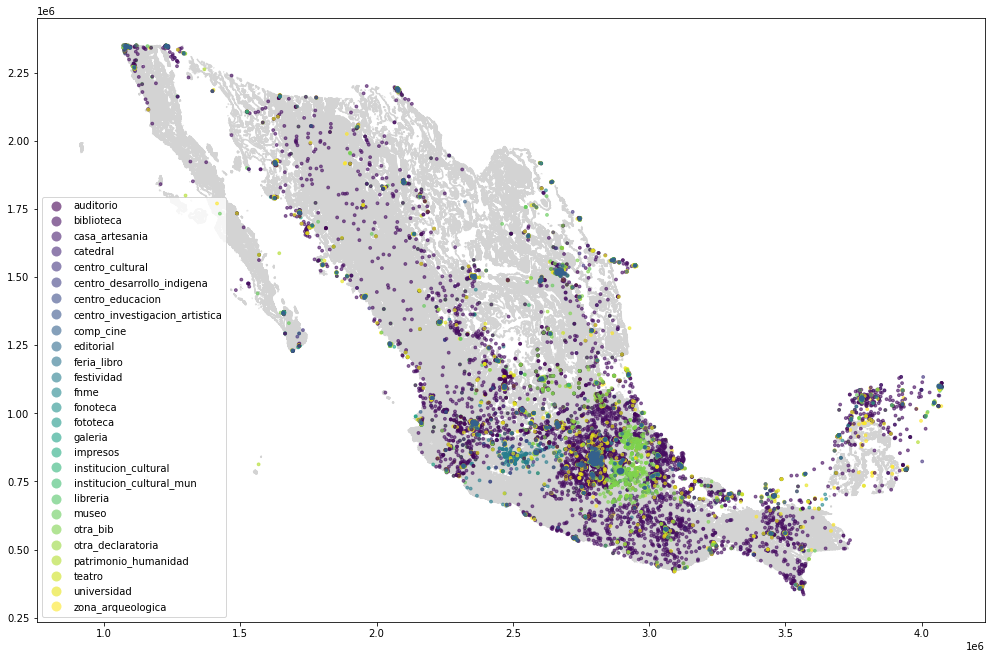

In [200]:
#3857
#6369
#6367 vista mexico, pero no para estos datos ni para este mapa
gdf = gdf[gdf['gmaps_latitud'] < 40]
gdf = gdf[gdf['gmaps_longitud'] < -45]
# gdf.sort_values(by=['gmaps_longitud'], ascending=False).head(50)
# gdf
# https://epsg.io/6372
gdf.to_crs(epsg=6372).plot(
    zorder=100, 
    ax=mexico.to_crs(epsg=6372).plot(color='lightgrey',figsize=(17, 14)), 
    marker='o', 
    markersize=8,
    alpha=0.6,
    column='type',
    cmap = "viridis",
    legend=True)

In [195]:
# gdf.explore()

## visualizar estados con mas entidades con plt

<AxesSubplot:xlabel='nom_ent'>

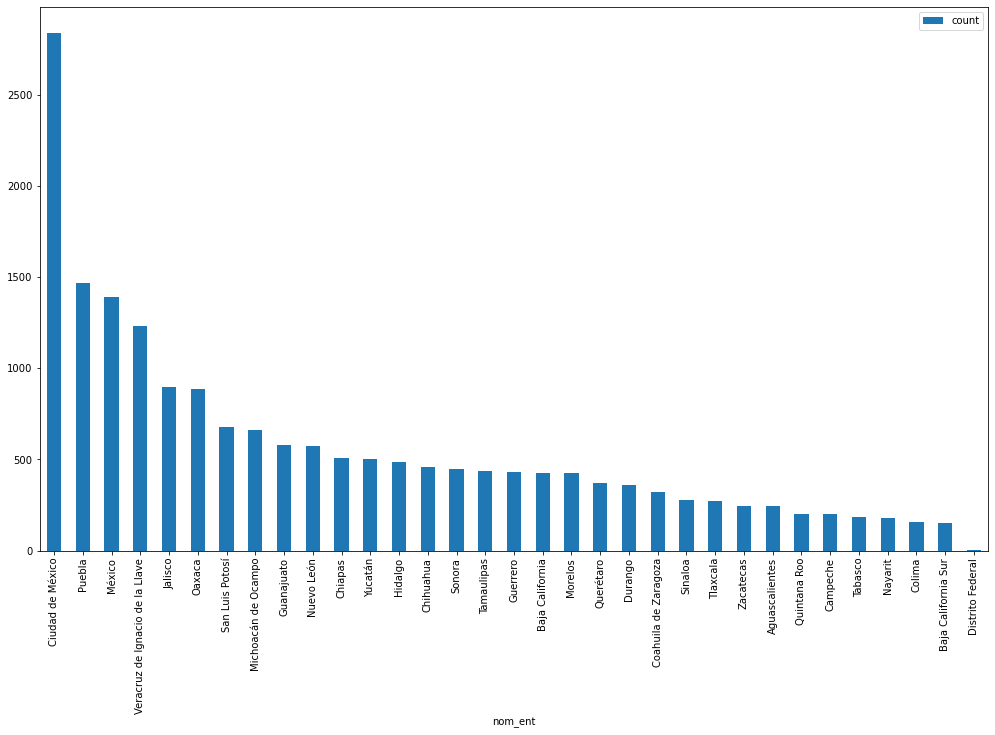

In [228]:
gdf.groupby(by=['nom_ent']).count()['index'].reset_index(name='count').sort_values(['count'], ascending=False).plot(kind='bar', figsize=(17, 10), x='nom_ent')

## visualizar cantidad de entidades por estado con plt

<AxesSubplot:xlabel='nom_ent_type'>

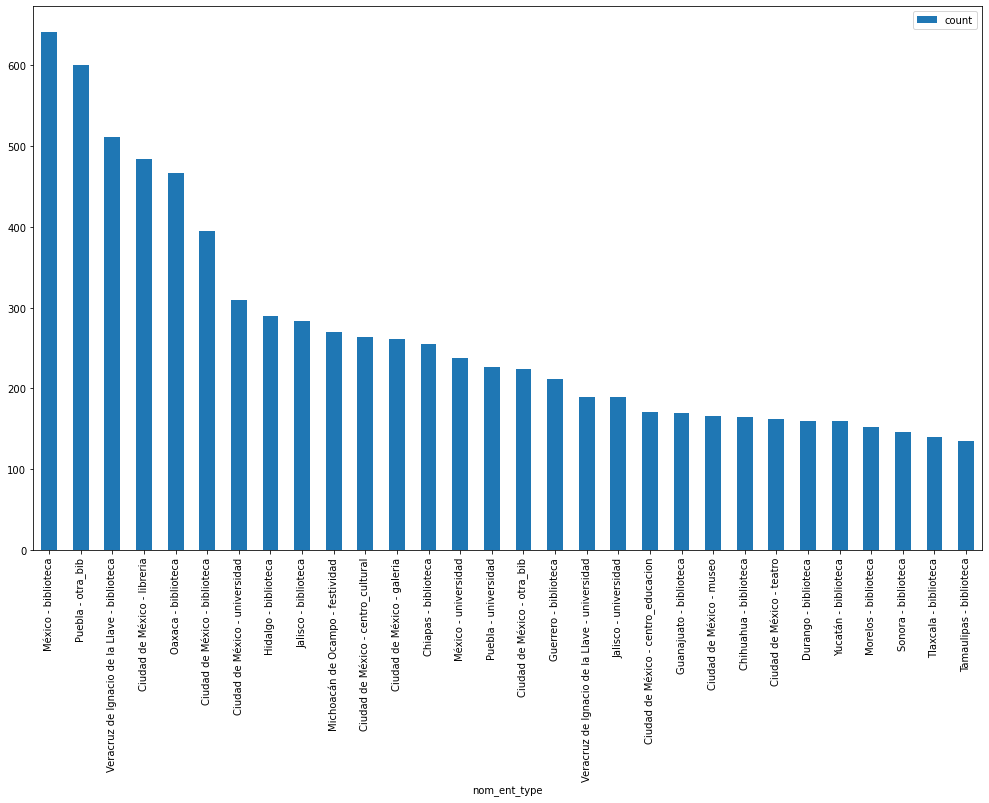

In [244]:
most_entities = gdf.groupby(by=['nom_ent', 'type']).count()['index'].reset_index(name='count').sort_values(['count'], ascending=False).head(30)
most_entities['nom_ent_type'] = most_entities['nom_ent'] + ' - ' + most_entities['type']
most_entities.plot(kind='bar', figsize=(17, 10), x='nom_ent_type')

## visualizar cantidad de entidades por estado con seaborn

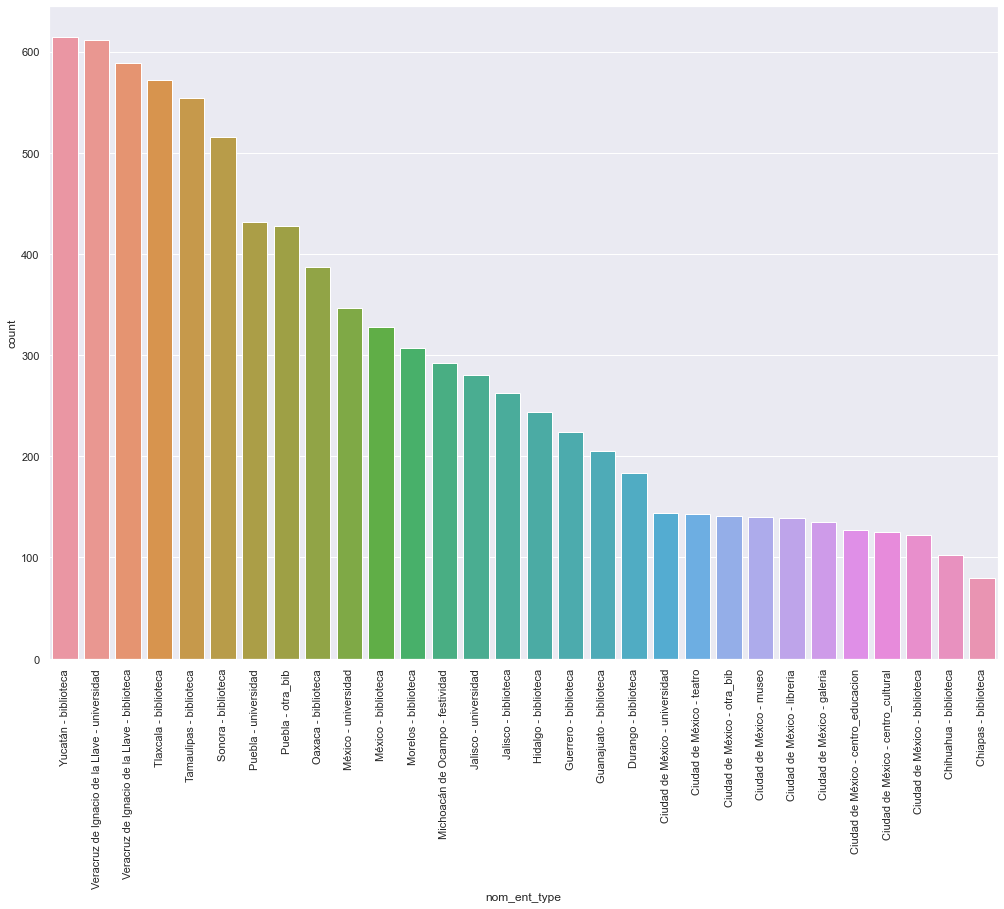

In [275]:
most_entities['counter'] = most_entities.index
most_entities_sort = most_entities.sort_values(['count'], ascending=False)
sns.barplot(data=most_entities_sort, x='nom_ent_type', y='count')#, hue='type')
plt.xticks(rotation=90)
plt.show()
# most_entities

## seaborn, color (hue) por tipo de entidad

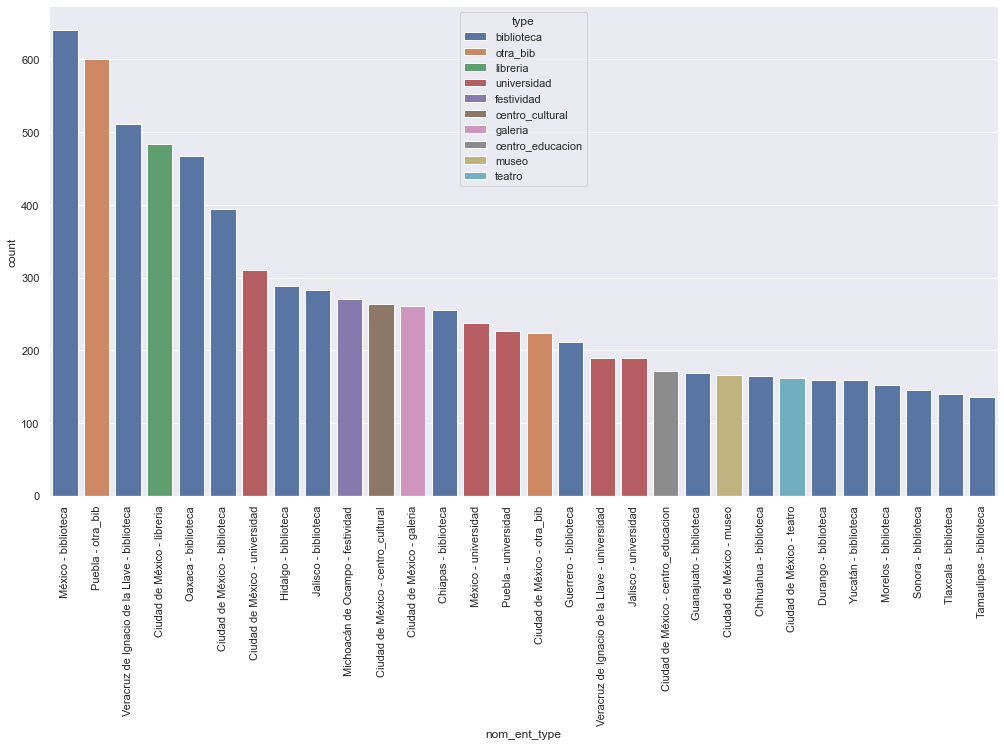

In [325]:
most_entities = gdf.groupby(by=['nom_ent', 'type']).count()['index'].reset_index(name='count').sort_values(['count'], ascending=False).head(30)
most_entities['nom_ent_type'] = most_entities['nom_ent'] + ' - ' + most_entities['type']
most_entities['counter'] = most_entities.index
most_entities_sort = most_entities.sort_values(['count'], ascending=False)
sns.barplot(data=most_entities_sort, x='nom_ent_type', y='count', hue='type', dodge=False)
plt.xticks(rotation=90)
plt.show()

## seaborn, color (hue) por tipo de entidad [sin bibliotecas]

/Users/nu9ve/opt/anaconda3/envs/data/lib/python3.9/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/Users/nu9ve/opt/anaconda3/envs/data/lib/python3.9/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


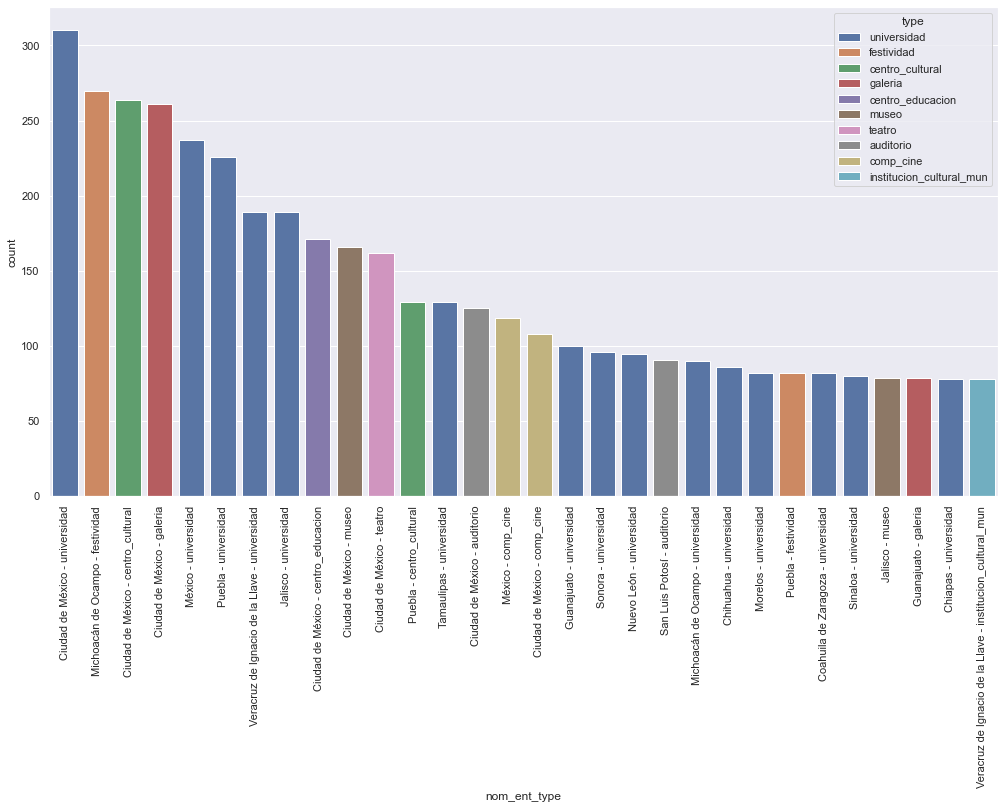

In [295]:
most_entities = gdf[gdf['type'] != 'biblioteca'][gdf['type'] != 'otra_bib'][gdf['type'] != 'libreria'].groupby(by=['nom_ent', 'type']).count()['index'].reset_index(name='count').sort_values(['count'], ascending=False).head(30)
most_entities['nom_ent_type'] = most_entities['nom_ent'] + ' - ' + most_entities['type']
most_entities['counter'] = most_entities.index
most_entities_sort = most_entities.sort_values(['count'], ascending=False)
sns.barplot(data=most_entities_sort, x='nom_ent_type', y='count', hue='type', dodge=False)
plt.xticks(rotation=90)
plt.show()

## sin bibliotecas ni universidades

/Users/nu9ve/opt/anaconda3/envs/data/lib/python3.9/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/Users/nu9ve/opt/anaconda3/envs/data/lib/python3.9/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


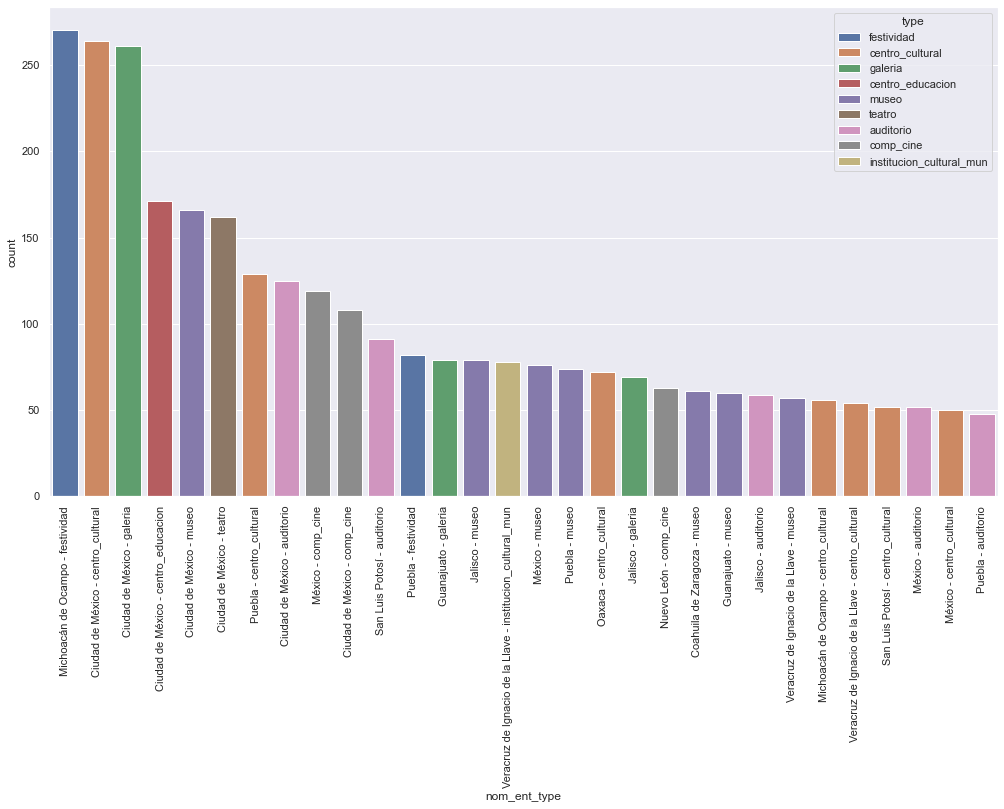

In [296]:
most_entities = gdf[gdf['type'] != 'biblioteca'][gdf['type'] != 'otra_bib'][gdf['type'] != 'libreria']
most_entities = most_entities[most_entities['type'] != 'universidad']
most_entities = most_entities.groupby(by=['nom_ent', 'type']).count()['index'].reset_index(name='count').sort_values(['count'], ascending=False).head(30)
most_entities['nom_ent_type'] = most_entities['nom_ent'] + ' - ' + most_entities['type']
most_entities['counter'] = most_entities.index
most_entities_sort = most_entities.sort_values(['count'], ascending=False)
sns.barplot(data=most_entities_sort, x='nom_ent_type', y='count', hue='type', dodge=False)
plt.xticks(rotation=90)
plt.show()

## mapa sin bibliotecas

/Users/nu9ve/opt/anaconda3/envs/data/lib/python3.9/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/Users/nu9ve/opt/anaconda3/envs/data/lib/python3.9/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


<AxesSubplot:>

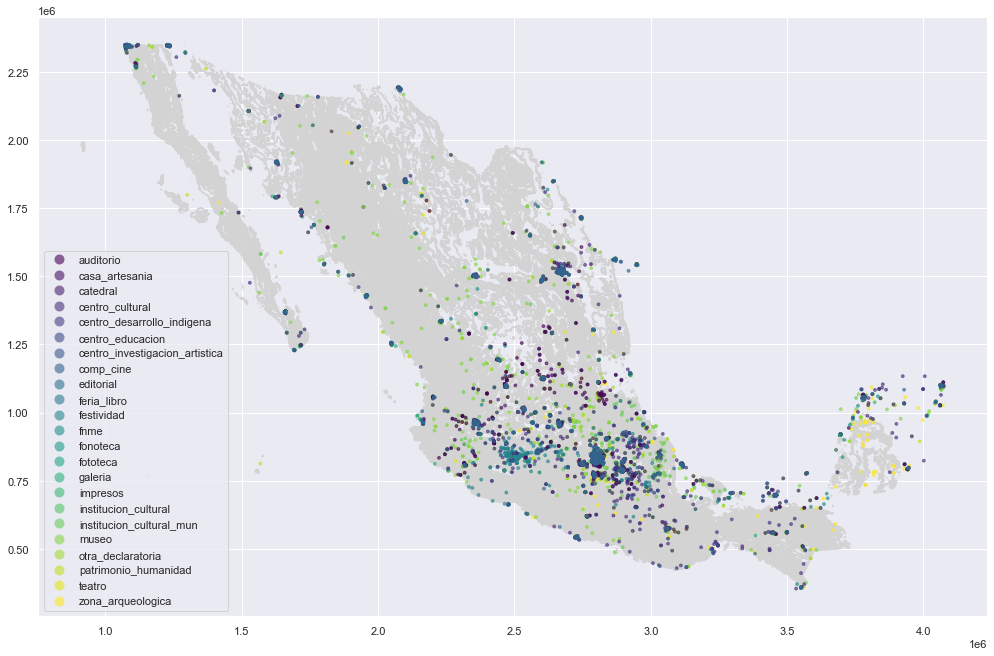

In [298]:
most_entities = gdf[gdf['type'] != 'biblioteca'][gdf['type'] != 'otra_bib'][gdf['type'] != 'libreria']
most_entities = most_entities[most_entities['type'] != 'universidad']
# most_entities = most_entities.groupby(by=['nom_ent', 'type'])

most_entities.to_crs(epsg=6372).plot(
    zorder=100, 
    ax=mexico.to_crs(epsg=6372).plot(color='lightgrey',figsize=(17, 14)), 
    marker='o', 
    markersize=8,
    alpha=0.6,
    column='type',
    cmap = "viridis",
    legend=True)

## bibliotecas por estado

<AxesSubplot:ylabel='nom_loc'>

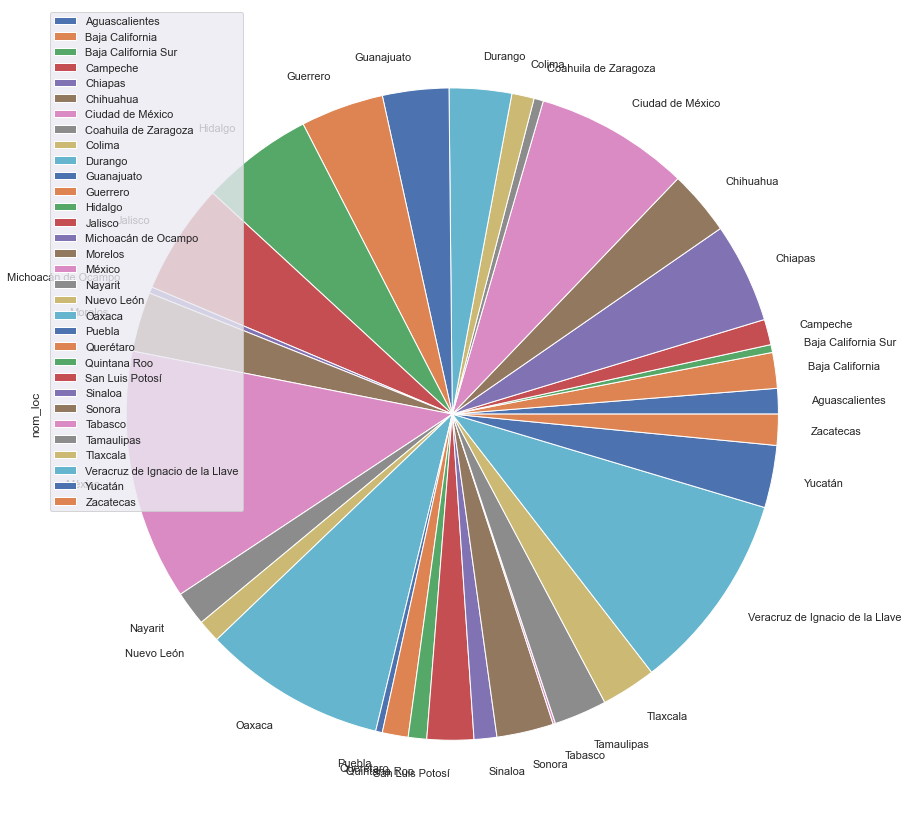

In [321]:
search_type = 'biblioteca'
gdf[['type','nom_ent','nom_loc']][gdf['type'] == search_type].groupby(by='nom_ent').count().plot.pie(y='nom_loc', figsize=(17, 15))